# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
data = pd.read_csv('diabetes.csv')

X = data.drop(columns=['Diabetes'])
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Sample size: {X_train.shape}")
print(f"Sample size test: {X_test.shape}")

Sample size: (3442, 17)
Sample size test: (861, 17)


In [3]:
adaModel = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

adaModel.fit(X_train, y_train)
y_pred_ada = adaModel.predict(X_test)
accuracy_ada  = accuracy_score(y_test, y_pred_ada)


gbModel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbModel.fit(X_train, y_train)
y_pred_gb = gbModel.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)


xgbModel = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False)

xgbModel.fit(X_train, y_train)
y_pred_xgb = xgbModel.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


print(f'AdaBoost: {accuracy_ada}')
print(f'Gradient Boosting: {accuracy_gb}')
print(f'XGBoost: {accuracy_xgb}')

e:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9407665505226481
Gradient Boosting: 0.9442508710801394
XGBoost: 0.943089430894309


e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	AdaBoost: 
Accuracy: 0.9407665505226481
Precision: 0.9471153846153846
Recall: 0.8312236286919831
F1-score: 0.8853932584269663
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.83      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      0.94       861


	Gradient Boosting: 
Accuracy: 0.9442508710801394
Precision: 0.9478672985781991
Recall: 0.8438818565400844
F1-score: 0.8928571428571429
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861


	XGBoost: 
Accuracy: 0.943089430894309
Precision: 0.9433962264150944
Recall: 0.84

e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


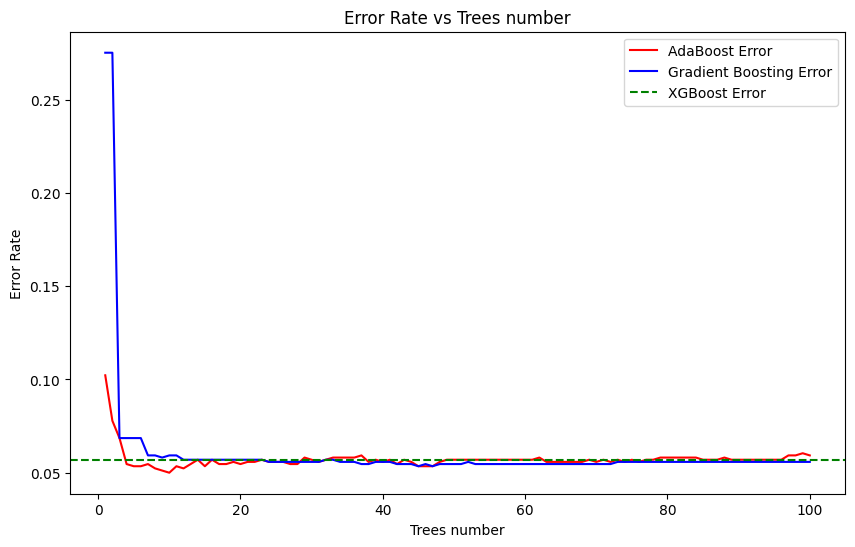

In [9]:
print("\tAdaBoost: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Precision: {precision_score(y_test, y_pred_ada)}")
print(f"Recall: {recall_score(y_test, y_pred_ada)}")
print(f"F1-score: {f1_score(y_test, y_pred_ada)}")

print(classification_report(y_test, y_pred_ada))

print("\n\tGradient Boosting: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Precision: {precision_score(y_test, y_pred_gb)}")
print(f"Recall: {recall_score(y_test, y_pred_gb)}")
print(f"F1-score: {f1_score(y_test, y_pred_gb)}")

print(classification_report(y_test, y_pred_gb))

print("\n\tXGBoost: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb)}")

print(classification_report(y_test, y_pred_xgb))

ada_errors = []
gb_errors = []

for ada_pred in adaModel.staged_predict(X_test):
    ada_errors.append(1 - accuracy_score(y_test, ada_pred))

for gb_pred in gbModel.staged_predict(X_test):
    gb_errors.append(1 - accuracy_score(y_test, gb_pred))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(ada_errors) + 1), ada_errors, label="AdaBoost Error", color='red')
plt.plot(np.arange(1, len(gb_errors) + 1), gb_errors, label="Gradient Boosting Error", color='blue')
plt.axhline(y=1 - accuracy_score(y_test, y_pred_xgb), label="XGBoost Error", color='green', linestyle='--')
plt.xlabel('Trees number')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Trees number')
plt.legend()
plt.show()



Завдання 4

In [10]:
ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada_grid = GridSearchCV(AdaBoostClassifier(), ada_param_grid, cv=5)
ada_grid.fit(X_train, y_train)

gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
gb_grid.fit(X_train, y_train)

xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False), xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

print("\nBest parameters for AdaBoost: " + str(ada_grid.best_params_))
print("\nBest parameters for Gradient Boosting: " + str(gb_grid.best_params_))
print("\nBest parameters for XGBoost: " + str(xgb_grid.best_params_))


e:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: Fu


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150}

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}


e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:54:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:54:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
ada_best_model = ada_grid.best_estimator_
gb_best_model = gb_grid.best_estimator_
xgb_best_model = xgb_grid.best_estimator_

y_pred_ada_best = ada_best_model.predict(X_test)
y_pred_gb_best = gb_best_model.predict(X_test)
y_pred_xgb_best = xgb_best_model.predict(X_test)

print("\n\tAdaBoost (Best Params): ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada_best):.4f}")
print(classification_report(y_test, y_pred_ada_best))

print("\n\tGradient Boosting (Best Params): ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb_best):.4f}")
print(classification_report(y_test, y_pred_gb_best))

print("\n\tXGBoost (Best Params): ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_best):.4f}")
print(classification_report(y_test, y_pred_xgb_best))


	AdaBoost (Best Params): 
Accuracy: 0.9443
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       624
           1       0.96      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861


	Gradient Boosting (Best Params): 
Accuracy: 0.9419
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      0.94       861


	XGBoost (Best Params): 
Accuracy: 0.9443
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.85      0.89       237

    accuracy                           0.9

Завдання 5

In [12]:
gb_param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}

gbModel_noReg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbModel_noReg.fit(X_train, y_train)
y_pred_gb_no_reg = gbModel_noReg.predict(X_test)

gbModel_Reg = GridSearchCV(GradientBoostingClassifier(), gb_param_grid_reg, cv=5)
gbModel_Reg.fit(X_train, y_train)
y_pred_gb_reg = gbModel_Reg.predict(X_test)

In [13]:
xgb_param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'alpha': [0.0, 0.1, 0.5],
    'lambda': [0.0, 0.1, 0.5]  
}

xgbModel_noReg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False)
xgbModel_noReg.fit(X_train, y_train)
y_pred_xgb_no_reg = xgbModel_noReg.predict(X_test)

xgbModel_Reg = GridSearchCV(XGBClassifier(use_label_encoder=False), xgb_param_grid_reg, cv=5)
xgbModel_Reg.fit(X_train, y_train)
y_pred_xgb_reg = xgbModel_Reg.predict(X_test)

e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:00:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:00:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:00:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
e:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:00:43] WARNING: C:\bui

In [16]:
print("Gradient Boosting NO reg:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb_no_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_gb_no_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_gb_no_reg)}")
print(f"F1-score: {f1_score(y_test, y_pred_gb_no_reg)}")
print(classification_report(y_test, y_pred_gb_no_reg))

print("\nGradient Boosting reg:")
print(f"Best parameters: {gbModel_Reg.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_gb_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_gb_reg)}")
print(f"F1-score: {f1_score(y_test, y_pred_gb_reg)}")
print(classification_report(y_test, y_pred_gb_reg))

Gradient Boosting NO reg:
Accuracy: 0.9442508710801394
Precision: 0.9478672985781991
Recall: 0.8438818565400844
F1-score: 0.8928571428571429
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861


Gradient Boosting reg:
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.6}
Accuracy: 0.943089430894309
Precision: 0.9433962264150944
Recall: 0.8438818565400844
F1-score: 0.89086859688196
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.93       861
weighted avg       0.94     

In [17]:
print("\nXGBoost NO reg:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_no_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_no_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb_no_reg)}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb_no_reg)}")
print(classification_report(y_test, y_pred_xgb_no_reg))

print("\nXGBoost reg:")
print(f"Best parameters: {xgbModel_Reg.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb_reg)}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb_reg)}")
print(classification_report(y_test, y_pred_xgb_reg))


XGBoost NO reg:
Accuracy: 0.943089430894309
Precision: 0.9433962264150944
Recall: 0.8438818565400844
F1-score: 0.89086859688196
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861


XGBoost reg:
Best parameters: {'alpha': 0.0, 'lambda': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 0.943089430894309
Precision: 0.9392523364485982
Recall: 0.8481012658227848
F1-score: 0.8913525498891353
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.85      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.93       861
weighted avg       0.

Завдання 6

In [22]:
print("Gradient Boosting (regularization):\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_gb_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_gb_reg)}")
print(f"F1-score: {f1_score(y_test, y_pred_gb_reg)}")

print("\n\nXGBoost (NO regularization):\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb_reg)}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb_reg)}")

Gradient Boosting (regularization):

Accuracy: 0.943089430894309
Precision: 0.9433962264150944
Recall: 0.8438818565400844
F1-score: 0.89086859688196


XGBoost (NO regularization):

Accuracy: 0.943089430894309
Precision: 0.9392523364485982
Recall: 0.8481012658227848
F1-score: 0.8913525498891353


Завдання 7 (Захист роботи)

1. Найкраща модель XGBoost, плюси:
 - високу продуктивність
 - висока точність на ткстових даних
 - XGBoost гнучка модель

2. AdaBoost теж добре показала результати і була менш чутливою до шуму.

3. Регуляризація покращує продуктивність моделей.

XGBoost з alpha (L1) і lambda (L2): 
 - допомагає зменшити складність моделі та перенавчання.
 - за допомоги регуляризація моделі стають менш чутливими до варіативності в даних.

Без Регуляризації (Gradient Boosting):
 - відсутність регуляризації призводить до потенційного перенавчання.
 - висока точність на тренувальнмх данних, але не на тестовх.

![error rate.png](<attachment:error rate.png>)




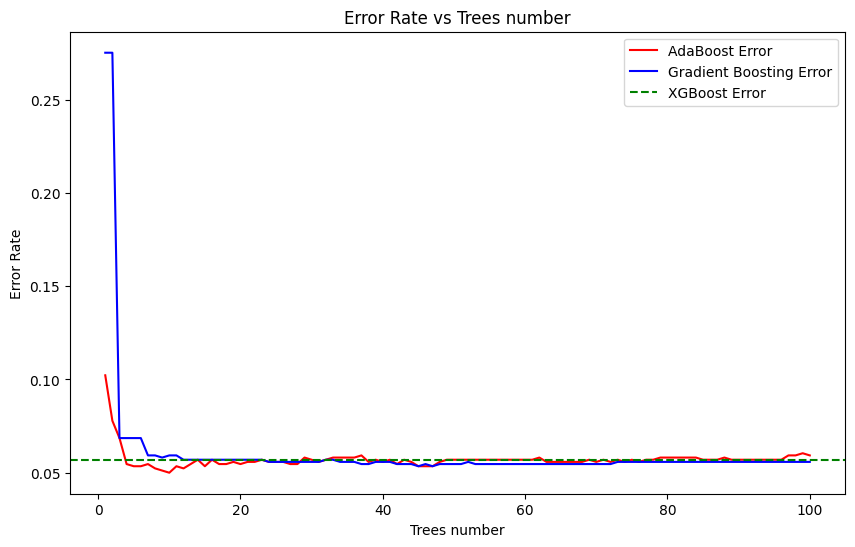